Link to Github Repositiory
https://github.com/BrandonShorter025/Project2_Brandon-Shorter


In [3]:
import pandas as pd
from matplotlib import pyplot
import numpy as np

In [4]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd

file_path = '/content/drive/My Drive/Life Expectancy Data.csv'


# Print the file path for confirmation
print("Loading file from:", file_path)

# Load the CSV
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

Loading file from: /content/drive/My Drive/Life Expectancy Data.csv


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


1. ***Problem statement***. Describe the dataset, analyze the target variable, and state your prediction goal. ***5 points***

Description of Dataset: The dataset is about factors influencing life expectancy across various countries. It includes health, economic, and demographic indicators that may affect how long people in different countries are expected to live.

Target Variable: Life Expectancy -The target variable in this study is Life Expectancy, measured in years. It represents the average number of years a newborn is expected to live under current mortality rates.

Prediciton Goal: The primary goal of this analysis is to build a predictive model that estimates life expectancy based on the dataset's features.

2. ***Basic data cleaning.***  Drop unwanted features.  Address missing values.  Remove Duplicates. Check if there are any inconsistent inputs for categorical variables. Transform categorical variables into numeric. Use boxplots or histogram to identify outliers for numeric variables and remove them. **20 points**

Missing values before handling:
 Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64
Missing values after handling:
 Year                               0
Status                             0
Life expectancy              

<ipython-input-22-31a1cd34eea9>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  life_expectancy_data[col].fillna(life_expectancy_data[col].mean(), inplace=True)


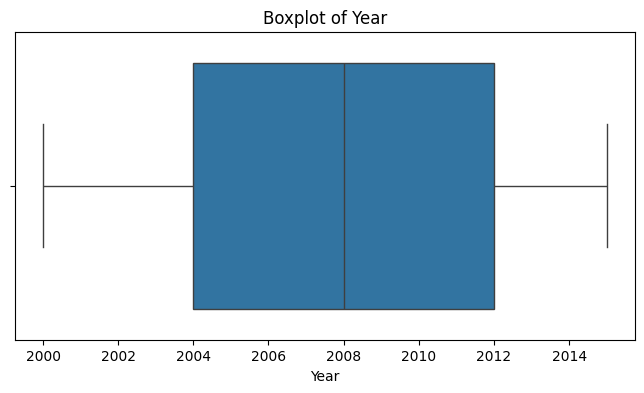

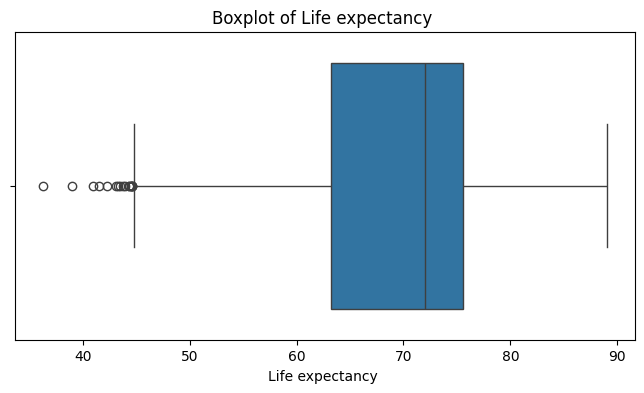

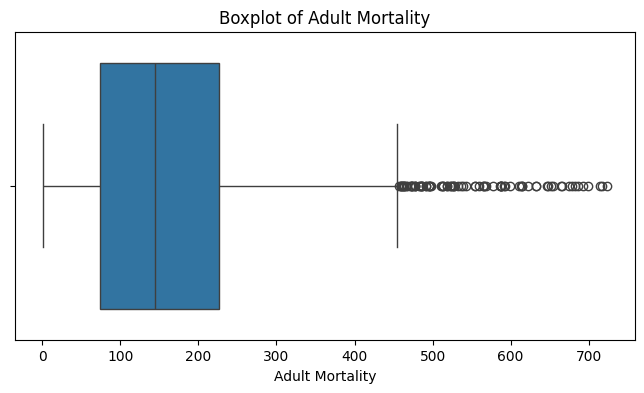

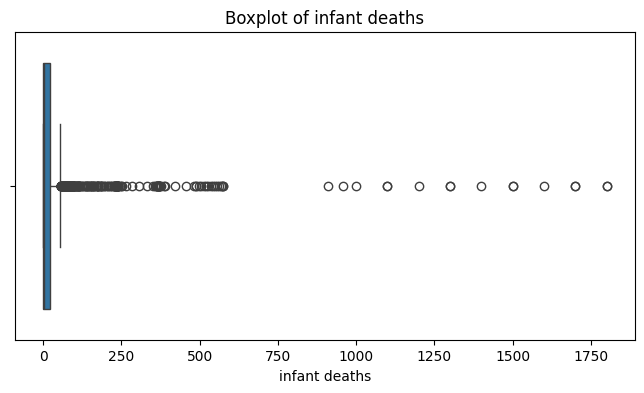

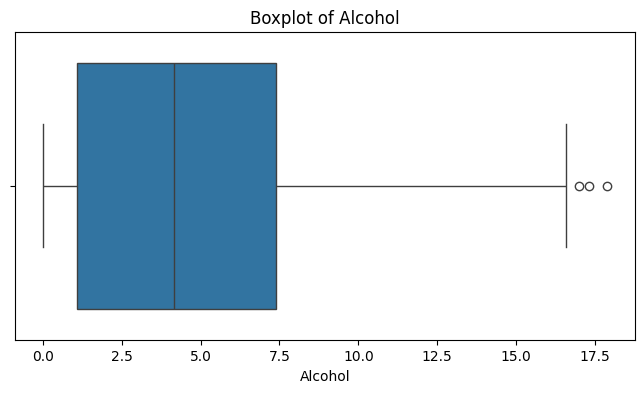

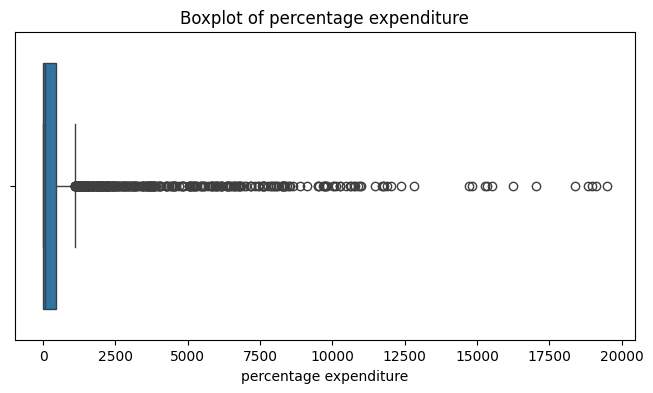

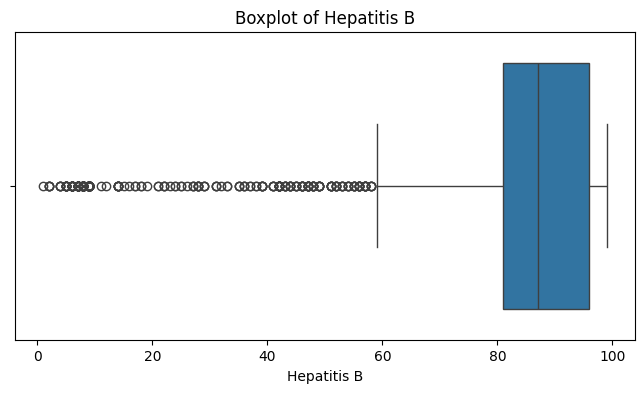

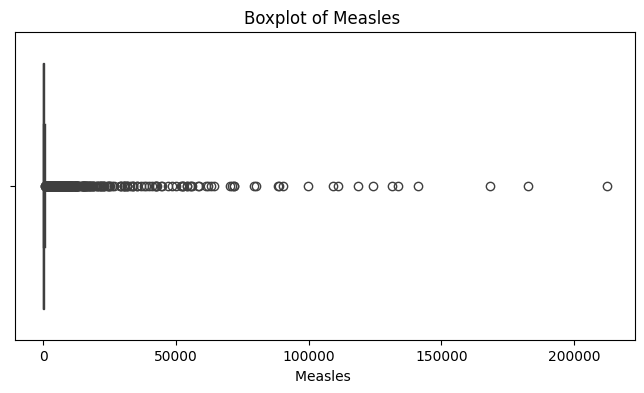

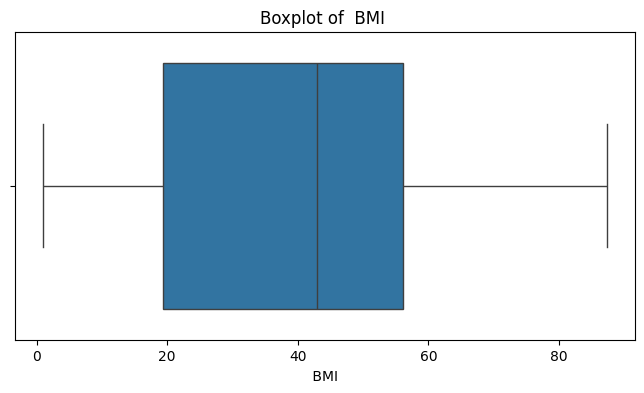

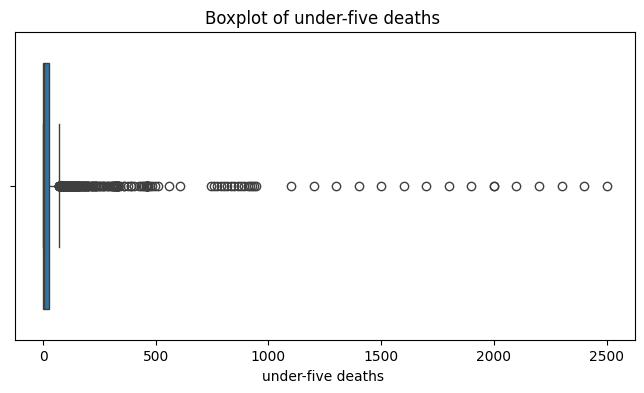

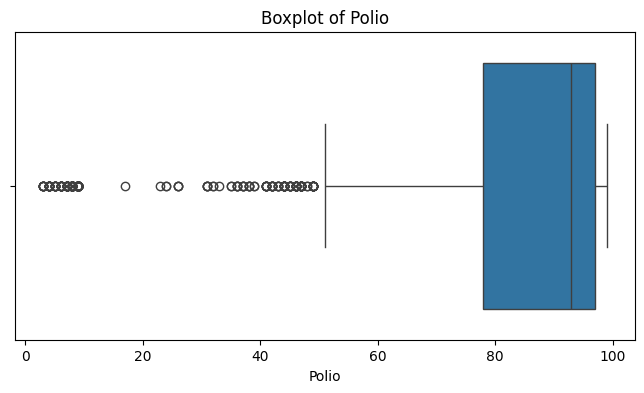

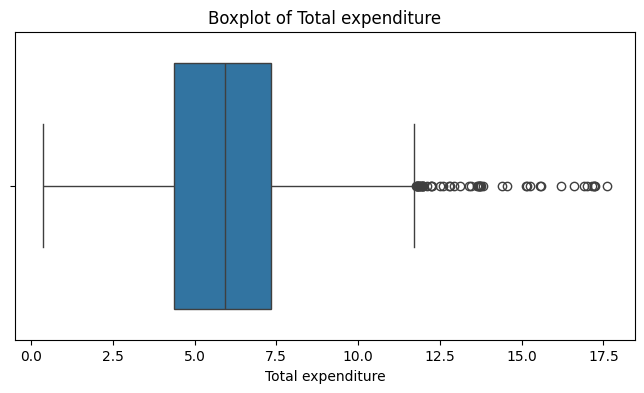

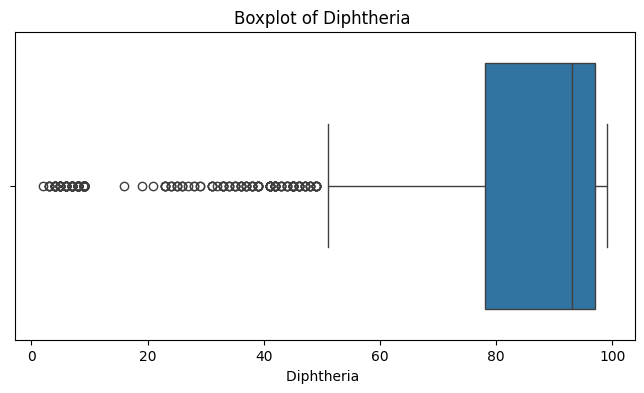

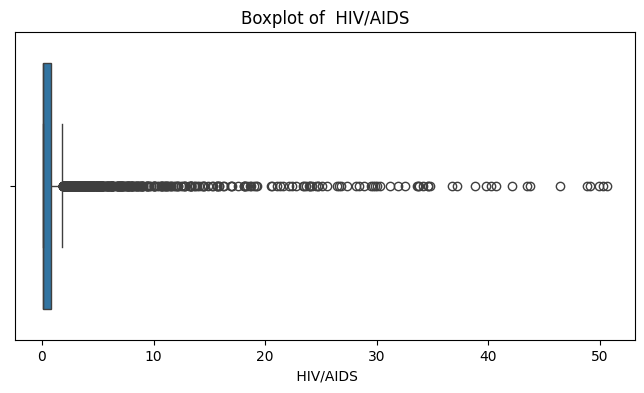

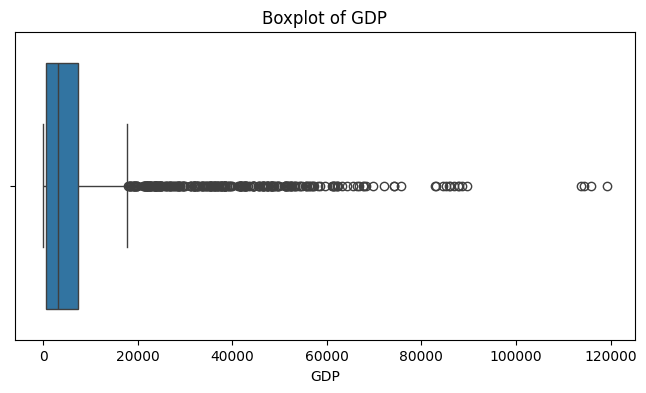

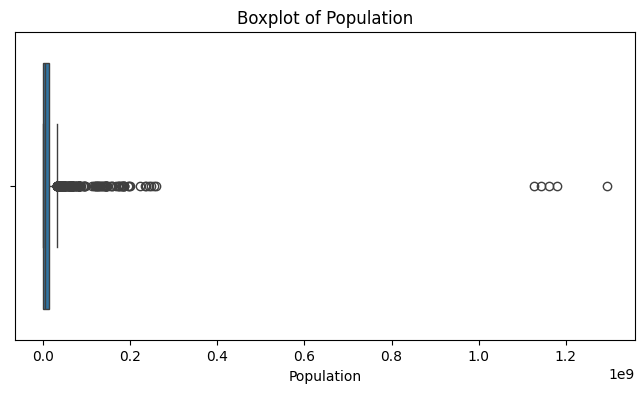

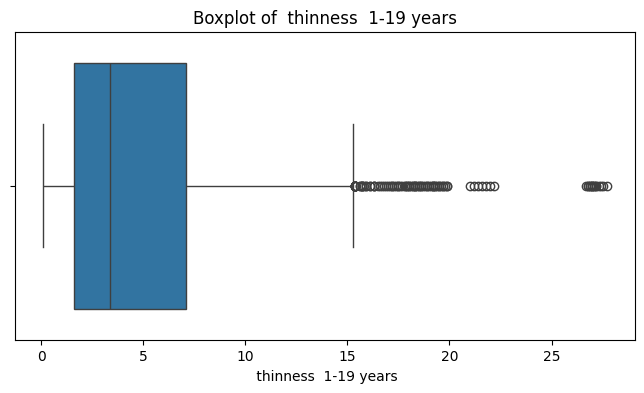

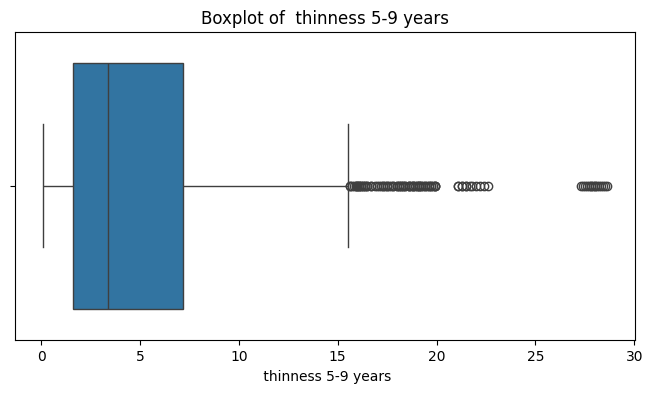

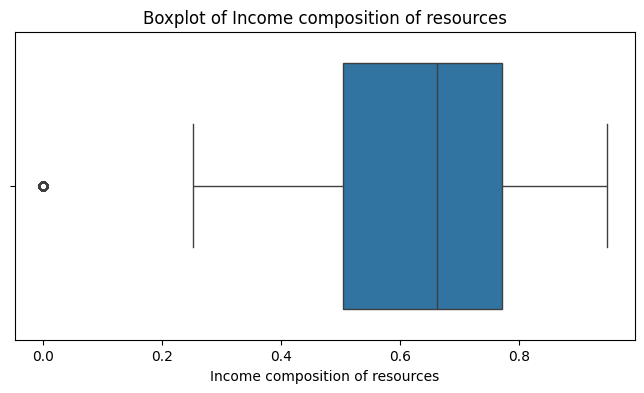

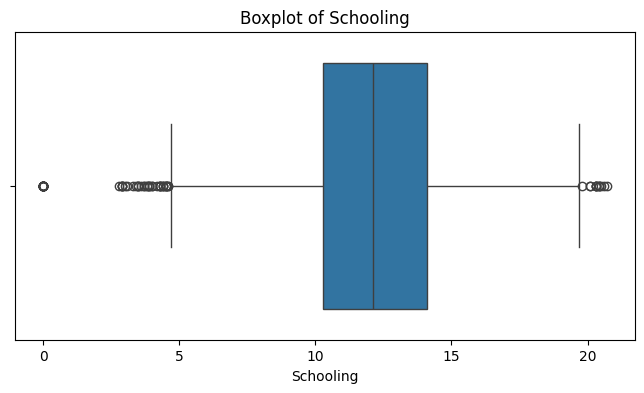

Data shape after outlier removal: (1193, 21)
Data sample:
     Year  Life expectancy   Adult Mortality  infant deaths  Alcohol  \
16  2015              77.8             74.0              0     4.60   
17  2014              77.5              8.0              0     4.51   
18  2013              77.2             84.0              0     4.76   
19  2012              76.9             86.0              0     5.14   
20  2011              76.6             88.0              0     5.37   

    percentage expenditure  Hepatitis B  Measles    BMI   under-five deaths   \
16              364.975229         99.0         0   58.0                   0   
17              428.749067         98.0         0   57.2                   1   
18              430.876979         99.0         0   56.5                   1   
19              412.443356         99.0         9   55.8                   1   
20              437.062100         99.0        28   55.1                   1   

    ...  Total expenditure  Dipht

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (replace with your file path in Colab)
file_path = '/content/drive/My Drive/Life Expectancy Data.csv'  # Changed to the correct path in your Google Drive
life_expectancy_data = pd.read_csv(file_path)

# Step 1: Drop Unwanted Features
# Dropping 'Country' column as it might not be relevant for regression
life_expectancy_data = life_expectancy_data.drop(columns=["Country"])

# Step 2: Address Missing Values
# Display count of missing values per column
print("Missing values before handling:\n", life_expectancy_data.isnull().sum())

# Example: Fill numeric columns with mean value
for col in life_expectancy_data.select_dtypes(include=['float64', 'int64']).columns:
    life_expectancy_data[col].fillna(life_expectancy_data[col].mean(), inplace=True)

# Display count of missing values after handling
print("Missing values after handling:\n", life_expectancy_data.isnull().sum())

# Step 3: Remove Duplicates
life_expectancy_data.drop_duplicates(inplace=True)
print("Data shape after removing duplicates:", life_expectancy_data.shape)

# Step 4: Check for Inconsistent Inputs in Categorical Variables
# Review unique values in 'Status' column for consistency
print("Unique values in 'Status':", life_expectancy_data['Status'].unique())

# Step 5: Transform Categorical Variables to Numeric
# Convert 'Status' column to numeric with one-hot encoding
life_expectancy_data = pd.get_dummies(life_expectancy_data, columns=['Status'], drop_first=True)

# Step 6: Identify and Remove Outliers
# Using boxplot to visualize outliers in each numeric column
numeric_cols = life_expectancy_data.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols: # Changed to iterate over only numeric columns
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=life_expectancy_data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Remove outliers based on Interquartile Range (IQR) method
Q1 = life_expectancy_data[numeric_cols].quantile(0.25) # Select numeric columns
Q3 = life_expectancy_data[numeric_cols].quantile(0.75) # Select numeric columns
IQR = Q3 - Q1

# Filter out rows with outliers in any column
life_expectancy_data = life_expectancy_data[~((life_expectancy_data[numeric_cols] < (Q1 - 1.5 * IQR)) | (life_expectancy_data[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Final Data Summary
print("Data shape after outlier removal:", life_expectancy_data.shape)
print("Data sample:\n", life_expectancy_data.head())

3. ***Feature Engineering.***
Feature selection. Use graphs, ANOVA test, Chi-squared test to reduce the dimension. Any variables with zero to little variance?  Any features Irrelevant to the target variable? Any high-correlated Features? Feature scaling. Does this algorithm require normalized data or standardized data?
Are there any categorical variables need to be changed to dummy variables?
 **20 points**



<ipython-input-7-9b729599de59>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  life_expectancy_data[col].fillna(life_expectancy_data[col].mean(), inplace=True)


Unique values in 'Status': ['Developing' 'Developed']


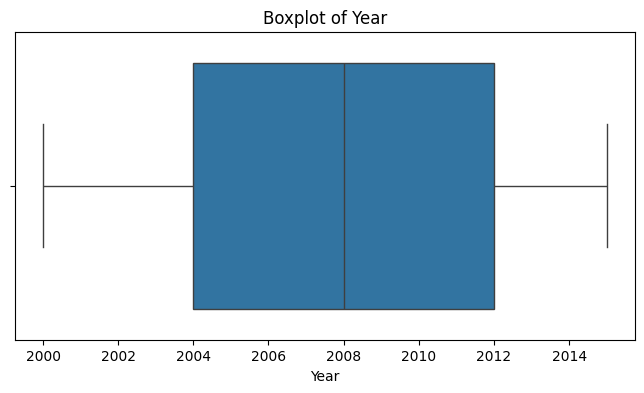

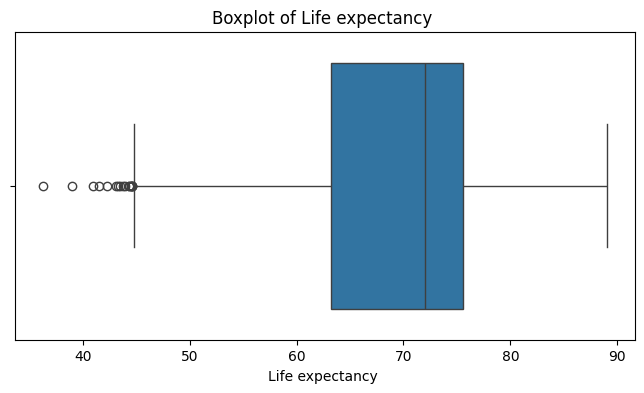

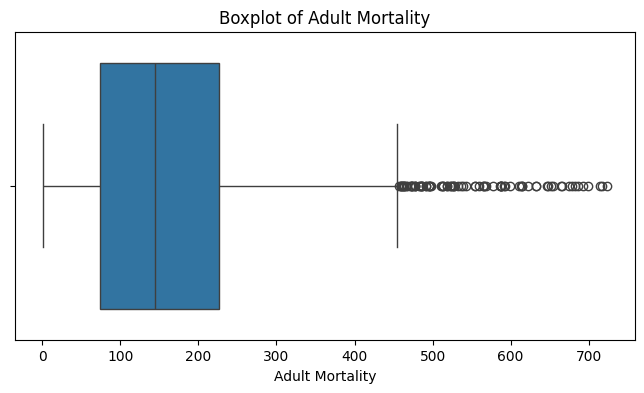

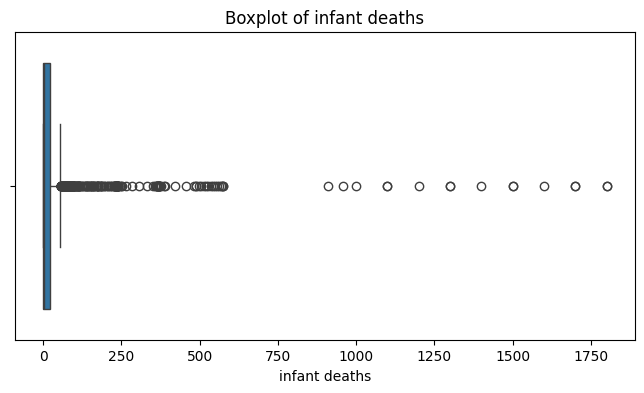

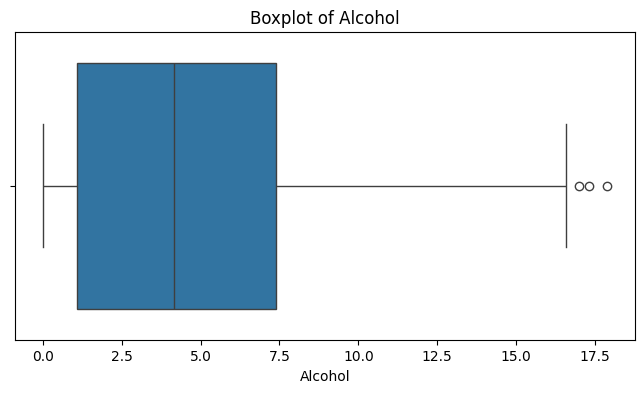

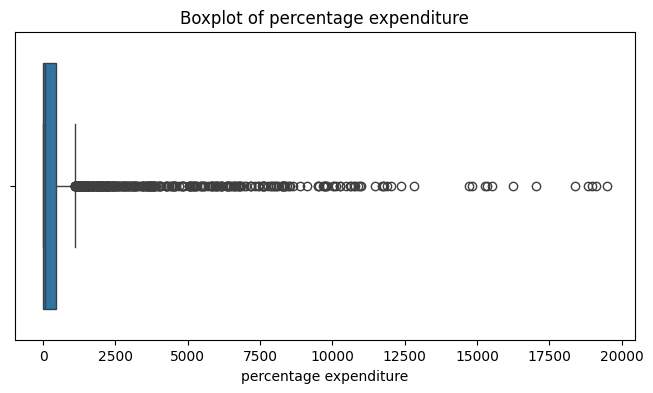

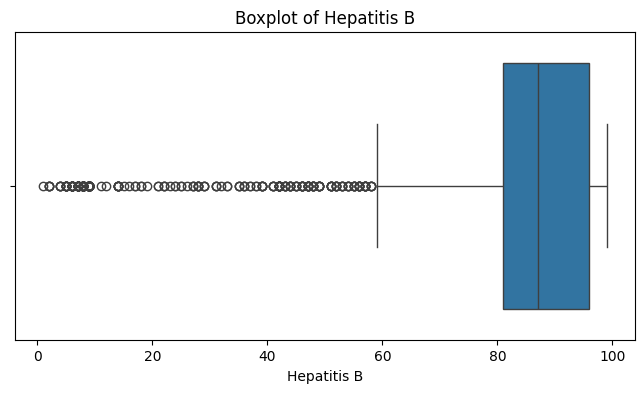

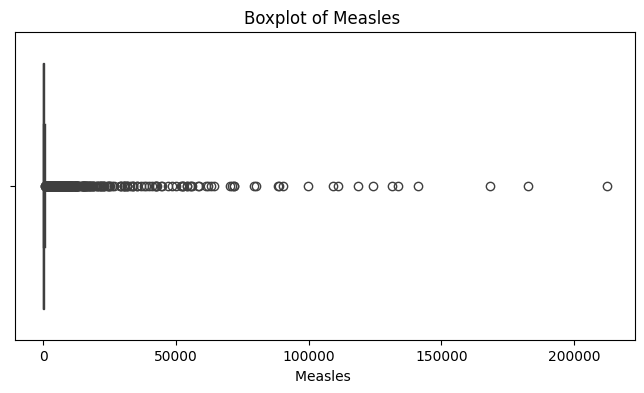

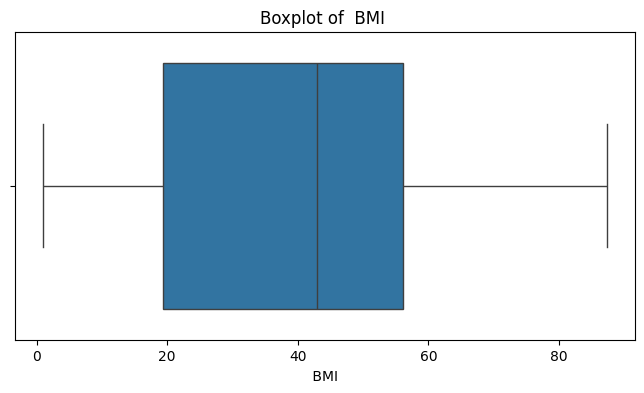

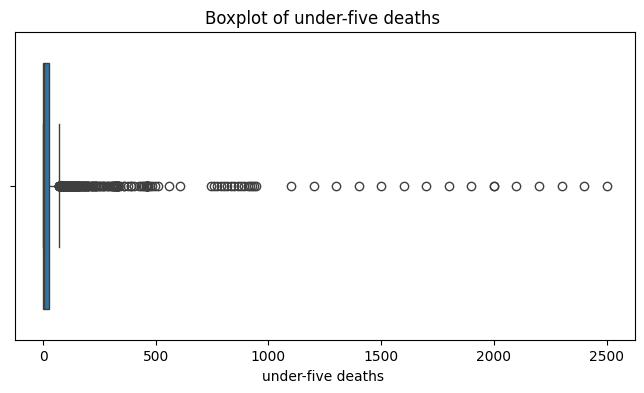

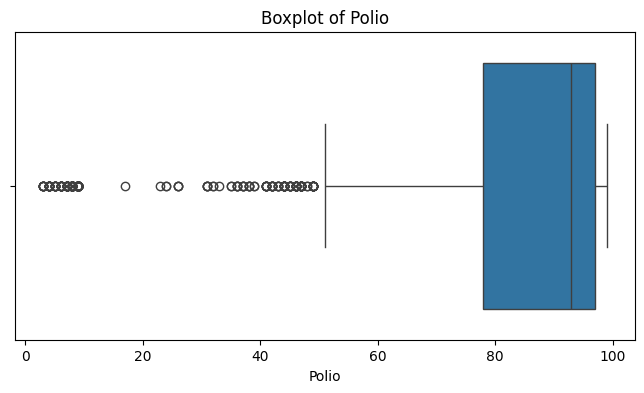

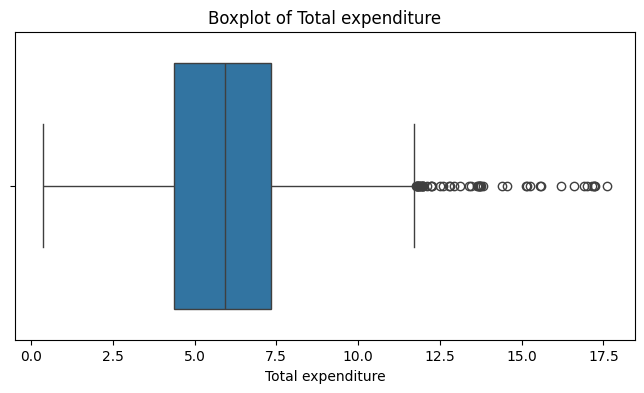

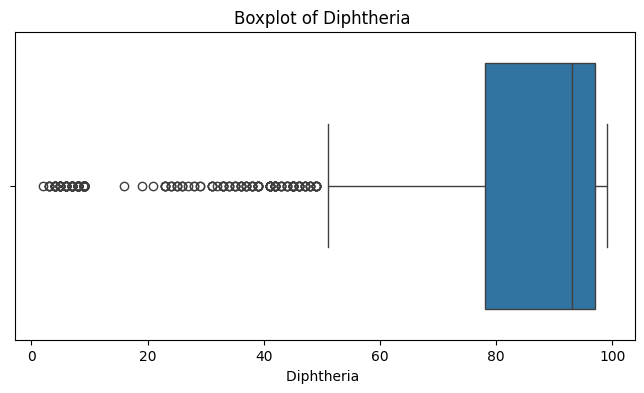

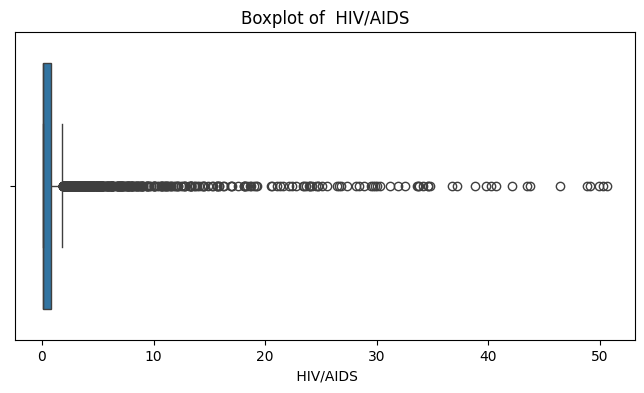

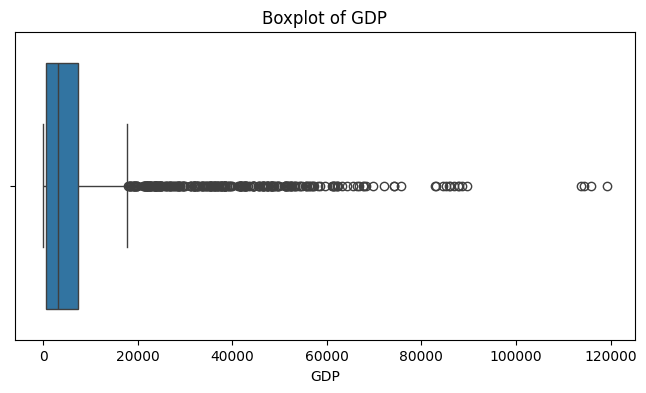

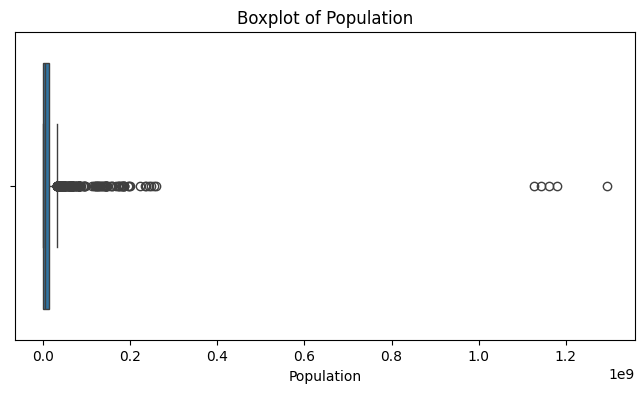

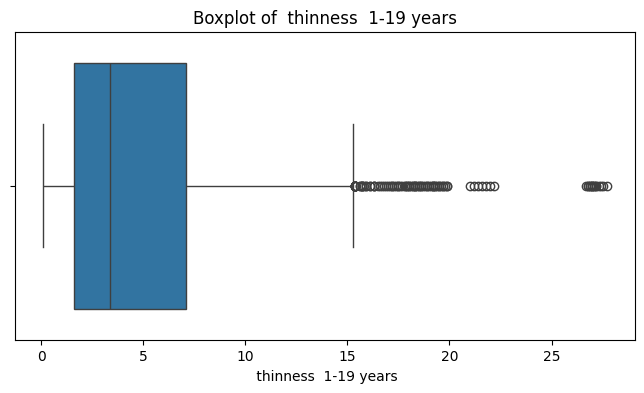

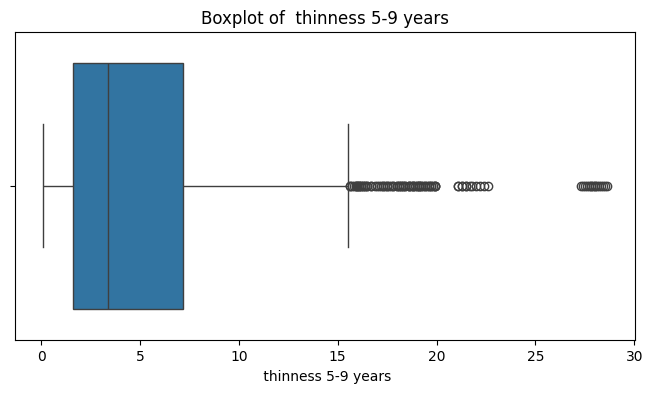

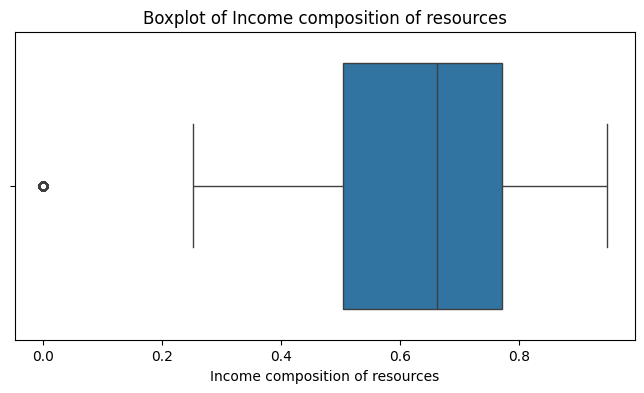

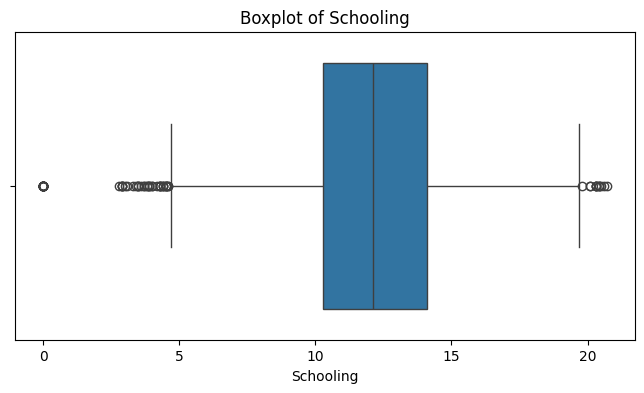

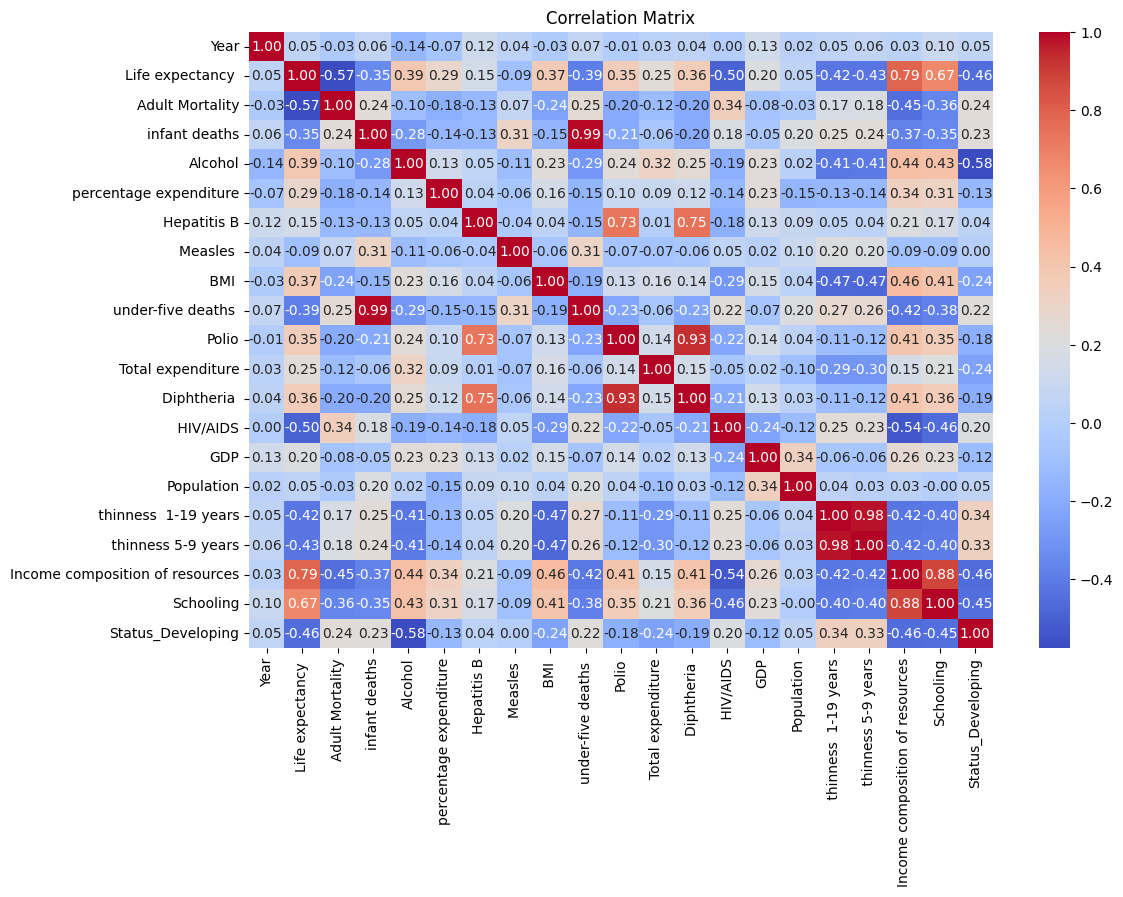

Low variance features to be dropped: []

ANOVA Test Results (sorted by p-value):
                            Feature    F-Score        p-Value
17  Income composition of resources  11.103833  1.716809e-161
18                        Schooling   6.096988   7.903086e-89
12                         HIV/AIDS   4.897538   1.052331e-67
1                   Adult Mortality   4.600391   3.126734e-62
19                Status_Developing   2.697522   9.595060e-26
11                      Diphtheria    2.671070   3.072103e-25
8                under-five deaths    2.612158   4.068994e-24
9                             Polio   2.480372   1.254369e-21
15             thinness  1-19 years   2.431050   1.049432e-20
16               thinness 5-9 years   2.373110   1.251223e-19
2                     infant deaths   1.929387   9.025610e-12
10                Total expenditure   1.917888   1.402047e-11
3                           Alcohol   1.686008   6.400485e-08
7                              BMI    1.683068   7.

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif, chi2
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load dataset (replace with your file path in Colab)
file_path = '/content/drive/My Drive/Life Expectancy Data.csv'  # Correct file path
life_expectancy_data = pd.read_csv(file_path)

# Step 1: Drop Unwanted Features
life_expectancy_data = life_expectancy_data.drop(columns=["Country"])  # Drop 'Country' column

# Step 2: Address Missing Values
# Fill missing values in numeric columns with mean
for col in life_expectancy_data.select_dtypes(include=['float64', 'int64']).columns:
    life_expectancy_data[col].fillna(life_expectancy_data[col].mean(), inplace=True)

# Step 3: Remove Duplicates
life_expectancy_data.drop_duplicates(inplace=True)

# Step 4: Check for Inconsistent Inputs in Categorical Variables
# Check unique values in 'Status' column for consistency
print("Unique values in 'Status':", life_expectancy_data['Status'].unique())

# Step 5: Transform Categorical Variables to Numeric
# Convert 'Status' column to numeric using one-hot encoding
life_expectancy_data = pd.get_dummies(life_expectancy_data, columns=['Status'], drop_first=True)

# Step 6: Identify and Remove Outliers
numeric_cols = life_expectancy_data.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=life_expectancy_data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Remove outliers using Interquartile Range (IQR) method
Q1 = life_expectancy_data[numeric_cols].quantile(0.25)
Q3 = life_expectancy_data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
life_expectancy_data = life_expectancy_data[~((life_expectancy_data[numeric_cols] < (Q1 - 1.5 * IQR)) |
                                              (life_expectancy_data[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Step 7: Feature Engineering and Selection

# 7.1: Correlation Analysis
# Calculate and plot the correlation matrix
correlation_matrix = life_expectancy_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Identify and drop features with zero variance
variance = life_expectancy_data.var()
low_variance_features = variance[variance == 0].index
print("Low variance features to be dropped:", low_variance_features.tolist())
life_expectancy_data.drop(columns=low_variance_features, inplace=True)

# 7.2: ANOVA Test (for numeric vs target variable)
from sklearn.feature_selection import f_classif

# Fix: Use the correct column name with the leading space if it exists
X = life_expectancy_data.drop(columns=['Life expectancy '])  # Assuming 'Life expectancy ' is the target variable
y = life_expectancy_data['Life expectancy ']

# Perform the ANOVA test
F_values, p_values = f_classif(X, y)

# Create a DataFrame to display F-scores and p-values
anova_results = pd.DataFrame({
    'Feature': X.columns,
    'F-Score': F_values,
    'p-Value': p_values
})

# Display results sorted by p-value
anova_results.sort_values(by='p-Value', inplace=True)
print("\nANOVA Test Results (sorted by p-value):")
print(anova_results)

In [32]:
# Step 7: Feature Engineering and Splitting Data
# Split data into features (X) and target (y)
X = life_expectancy_data.drop(columns='Life expectancy ')
y = life_expectancy_data['Life expectancy ']

# Split the data into training and testing sets (80% training, 20% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: You can check the shapes of the resulting datasets
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

Training features shape: (954, 20)
Testing features shape: (239, 20)
Training target shape: (954,)
Testing target shape: (239,)


4. ***Build the prediction model.***
Does this data need to be balanced?
Do you use train_test_split or cross validation to validate the result?
Which algorithm is appropriate for this problem?
Which metrics do you use to evaluate the prediction model?
If the accuracy score or r-squared score is low, generally it is considered as a bad model. Explain why your model failed. **20 points**

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Load and preprocess the data
file_path = '/content/drive/My Drive/Life Expectancy Data.csv'  # Adjust path if needed
life_expectancy_data = pd.read_csv(file_path)

# Preprocessing steps (same as before)
life_expectancy_data = life_expectancy_data.drop(columns=["Country"])

# Handle missing values
for col in life_expectancy_data.select_dtypes(include=['float64', 'int64']).columns:
    life_expectancy_data[col].fillna(life_expectancy_data[col].mean(), inplace=True)

# Remove duplicates
life_expectancy_data.drop_duplicates(inplace=True)

# One-hot encoding of 'Status' column
life_expectancy_data = pd.get_dummies(life_expectancy_data, columns=['Status'], drop_first=True)

# Remove outliers
numeric_cols = life_expectancy_data.select_dtypes(include=['float64', 'int64']).columns
Q1 = life_expectancy_data[numeric_cols].quantile(0.25)
Q3 = life_expectancy_data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
life_expectancy_data = life_expectancy_data[~((life_expectancy_data[numeric_cols] < (Q1 - 1.5 * IQR)) |
                                              (life_expectancy_data[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Feature and target selection
X = life_expectancy_data.drop(columns='Life expectancy ')
y = life_expectancy_data['Life expectancy ']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print(f"R² Score: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

<ipython-input-33-d77b8fcefdfb>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  life_expectancy_data[col].fillna(life_expectancy_data[col].mean(), inplace=True)


R² Score: 0.8623624605671455
Mean Squared Error: 3.6011954892473224
Root Mean Squared Error: 1.8976816090291126
Mean Absolute Error: 1.2616172519834434


Link to the Video:
https://www.loom.com/share/7634ee87f87e44b791e105364f94c3ab